In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import cv2
import glob
import pywt
import os
import matplotlib.pyplot as plt

Storing Four different CSV consisiting of :-
 - First with PCA only
 - Second With wavelet transform and then PCA 
 - Third with Standard Scaled wavelet images
 - Fourth with Standard Scaled gray images

In [4]:
train_imgs = glob.glob("../data/train/*/*")

In [5]:
pca_only = []
wavelet_pca = []
names = []
for img_path in train_imgs:
    names.append(os.path.basename(img_path)[:-9])
    ## reading and gray scaling image
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ## transfroming into db4 wavelet and choose LL Subband
    cA, (cH, cV, cD) = pywt.dwt2(gray, "db4")
    wavelet_pca.append(np.ravel(cA))
    pca_only.append(np.ravel(gray))
    

In [6]:
wavelet_pca = np.asarray(wavelet_pca)
pca_only = np.asarray(pca_only)

In [7]:
## normalizing bot data using Standard Scaler 
s1 = StandardScaler()
s2 = StandardScaler()
normalized_wavelet_pca = s1.fit_transform(wavelet_pca)
normalized_pca_only =s2.fit_transform(pca_only)

In [8]:
## for wavelet type
p1 = PCA()
p1.fit(normalized_wavelet_pca)

PCA()

In [9]:
## for normal gray image
p2 = PCA()
p2.fit(normalized_pca_only)

PCA()

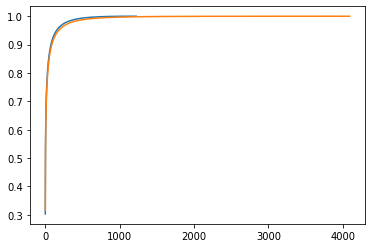

In [10]:
plt.plot(np.cumsum(p1.explained_variance_ratio_))
plt.plot(np.cumsum(p2.explained_variance_ratio_))

In [11]:
print("number of features which explained more than 96% variance")
print("for wavelet based pca - ", np.where(np.cumsum(p1.explained_variance_ratio_)>0.96)[0][0])
print("for gray image pca - ", np.where(np.cumsum(p2.explained_variance_ratio_)>0.96)[0][0])
## out of 1225 only 183 features is needed for explaining more than 96 percent variance in wavelet based pca
## out of 4096 only 218 features is needed for explaining more than 96 percent variance in gray image pca
## means most of the features are redundant in original image


number of features which explained more than 96% variance
for wavelet based pca -  183
for gray image pca -  218


In [12]:
eigen_vecs_wavelet = pd.DataFrame(p1.components_)
eigen_vecs_gray = pd.DataFrame(p2.components_)
wavelet_std_features = pd.DataFrame(normalized_wavelet_pca)
gray_std_features = pd.DataFrame(normalized_pca_only)
wavelet_std_features["names"] = names
gray_std_features['names'] = names

In [13]:
eigen_vecs_wavelet.to_csv("../data/eigen_vecs_wavelet.csv", index = False)
eigen_vecs_gray.to_csv("../data/eigen_vecs_gray.csv", index = False)
wavelet_std_features.to_csv("../data/wavelet_std_features.csv", index = False)
gray_std_features.to_csv("../data/gray_std_features.csv", index = False)

In [14]:
## storing the mean of train data for preprocessing test data
with open("../config/wavelet_mean.txt", "w") as w:
    w.write("[")
    w.write("\n")
    mean = s1.mean_
    for i in mean:
      w.write(str(i))
      w.write("\n")
    w.write("]")
    w.write("\n")
with open("../config/gray_mean.txt", "w") as w:
    w.write("[")
    w.write("\n")
    mean = s2.mean_
    for i in mean:
      w.write(str(i))
      w.write("\n")
    w.write("]")
    w.write("\n")
    